In [ ]:
<a href="https://colab.research.google.com/github/Lsx961029/AI-Course/blob/master/Iris%20Data%20Set%20Logistic%20Regression-%20BGD%20MBGD%20SGD.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## MEME

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://breakbrunch.com/wp-content/uploads/2020/02/5e3c7737997ecd89f.jpg")

In [2]:
Image(url= "https://lh3.googleusercontent.com/proxy/jlDMMam4qDxxEv0yyaq5xVyv5mtizhQDlB8ClE6zg8l2xBy8A_lDvkFr1dZXyqEobE-O-zyYhL5N5QYwqRTwZHQEvYcbHiFXzorP0l_v-o0ISVk5ceeq_2wxig")

# Explaination: Here is the implementation of building a classification model to classify iris flowers. I use Batch Gradient Descent, Stochastic Gradient Descent and Mini-Batch Gradient Descent algorithm as optimizer respectively to minimize our loss function, optimize the weights parameters and train the model.

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import datasets

#sigmoid funciton
def sigmoid(y):
    s = 1.0/(1.0+np.exp(-y))
    return s

#cross entropy
def cost_function(x_matrix,weights,y_matrix):
    m, n = x_matrix.shape
    hypothesis = sigmoid(np.dot(x_matrix, weights))  # prediction value
    cost = (-1.0 / m) * np.sum(y_matrix.T * np.log(hypothesis) + (1 - y_matrix).T * np.log(1 - hypothesis))  # loss fuction
    return cost



def BGD(data_x,data_y,alpha=0.1,maxepochs=10000,epsilon=1e-4):
    starttime = time.time()
    x_matrix = np.mat(data_x)
    y_matrix = np.mat(data_y)
    m,n = x_matrix.shape
    
    weights = np.ones((n,1)) #initilize weights parameters theta
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        loss = cost_function(x_matrix, weights, y_matrix) #loss value
        hypothesis = sigmoid(np.dot(x_matrix, weights)) #hypothesis value
        error = hypothesis - y_matrix 
        gradient = (1.0/m)*np.dot(x_matrix.T, error)
        
        last_weights = weights
        weights = weights - alpha*gradient #update weights theta
        loss_new = cost_function(x_matrix, weights, y_matrix)#new loss value
        
        if abs(loss_new-loss)<epsilon:
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
    print("Weights_Theta:", weights)
    print("Final loss value: ", loss_new)
    print("BGD Duration：", time.time() - starttime)
    print('Iteration: ',epochs_count)
    plt.plot(epochs_list,loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

def SGD(data_x, data_y, alpha=0.1, maxepochs=10000,epsilon=1e-4):
    starttime = time.time()
    x_matrix = np.mat(data_x)
    y_matrix = np.mat(data_y)
    m, n = x_matrix.shape
    weights = np.ones((n, 1))
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        
        rand = np.random.randint(m)  # get a random example
        
        loss = cost_function(x_matrix,weights,y_matrix)
        hypothesis = sigmoid(np.dot(x_matrix[rand,:],weights)) #use the random row of x_matrix
        error = hypothesis -y_matrix[rand,:] #use the random row of y_matrix
        gradient = np.dot(x_matrix[rand,:].T,error)
        weights = weights - alpha*gradient
        loss_new = cost_function(x_matrix,weights,y_matrix)
        if abs(loss_new-loss)<epsilon:
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
        
    print(weights)
    print("Final loss value: ", loss_new)
    print("SGD Duration：", time.time() - starttime)
    print('Iteration: ',epochs_count)
    plt.plot(epochs_list,loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights


def MBGD(data_x, data_y, alpha=0.1,batch_size=5, maxepochs=10000,epsilon=1e-4):
    starttime = time.time()
    x_matrix = np.mat(data_x)
    y_matrix = np.mat(data_y)
    m, n = x_matrix.shape
    weights = np.ones((n, 1))
    epochs_count = 0
    loss_list = []
    epochs_list = []
    while epochs_count < maxepochs:
        
        randIndex = np.random.choice(range(len(x_matrix)), batch_size, replace=False)#randomly choose 10 rows, use unique examples.
        
        loss = cost_function(x_matrix,weights,y_matrix)
        hypothesis = sigmoid(np.dot(x_matrix[randIndex],weights))
        error = hypothesis -y_matrix[randIndex]
        gradient = (1.0/batch_size)*np.dot(x_matrix[randIndex].T,error)
        weights = weights - alpha*gradient 
        loss_new = cost_function(x_matrix,weights,y_matrix)
        if abs(loss_new-loss)<epsilon:
            break
        loss_list.append(loss_new)
        epochs_list.append(epochs_count)
        epochs_count += 1
        
    print("Final loss value: ", loss_new)
    print("MBGD Duration：", time.time() - starttime)
    print('Iteration: ',epochs_count)
    plt.plot(epochs_list,loss_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    return weights

from sympy import *
def plot(weights):
    x=iris.data[0:100,:2]
    y=iris.target[0:100]
    data_x = pd.DataFrame(x, columns = ['x1','x2'])
    data_x.insert(0,'x0',1)
    data_y = pd.DataFrame(y, columns = ['label'])
    df=data_x
    df['label']=data_y
    
    x1=Symbol('x1')
    x2=Symbol('x2')
    expr1 = weights[0][0]+weights[1][0]*x1+weights[2][0]*x2
    x_list=np.linspace(4.0,7.0,100)
    
    for i in x_list:
        df=df.append({'x1': i, 'x2':solve([expr1.subs({x1:i})],x2)[x2],'label': 3}, ignore_index=True) 
    ax = df.plot.scatter(x="x1", y="x2", color="DarkBlue", label="label")
    
    colors = {0:'red', 1:'green',3:'blue'}
    
    ax.scatter(df['x1'], df['x2'], c=df['label'].apply(lambda x: colors[x]))

In [4]:
# Show data
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Formalize data set

In [5]:
#load data
iris = datasets.load_iris()
#For simplicity, I only choose 2 kinds of iris.
x=iris.data[0:100,:2]
y=iris.target[0:100]
data_x = pd.DataFrame(x, columns = ['x1','x2'])
data_x.insert(0,'x0',1)
data_y = pd.DataFrame(y, columns = ['label'])

## Batch Gradient Descent

### Learning rate $\alpha = 0.1$

Weights_Theta: [[-0.59208722]
 [ 4.07135931]
 [-6.92973542]]
Final loss value:  0.06969437625240918
BGD Duration： 0.225022554397583
Iteration:  2500


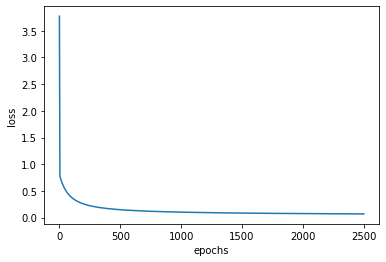

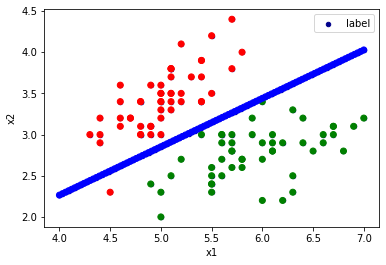

In [6]:
wBGD = BGD(data_x, data_y, alpha=0.1, maxepochs=10000, epsilon=1e-5)
wBGD = np.array(wBGD)
plot(wBGD)

### Learning rate $\alpha = 1$

Weights_Theta: [[ -0.57440196]
 [  6.05785928]
 [-10.41876002]]
Final loss value:  0.05159349764984386
BGD Duration： 0.02096080780029297
Iteration:  191


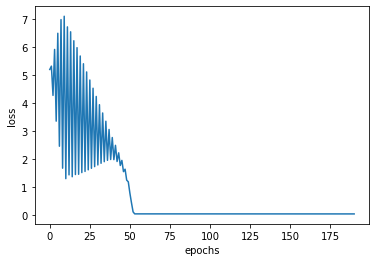

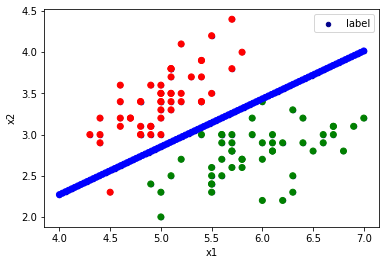

In [7]:
wBGD = BGD(data_x, data_y, alpha=1, maxepochs=10000, epsilon=1e-5)
wBGD = np.array(wBGD)
plot(wBGD)

## Stochastic Gradient Descent

[[-0.13461949]
 [ 3.45354769]
 [-5.97247462]]
Final loss value:  0.08517380158479769
SGD Duration： 0.11803197860717773
Iteration:  1137


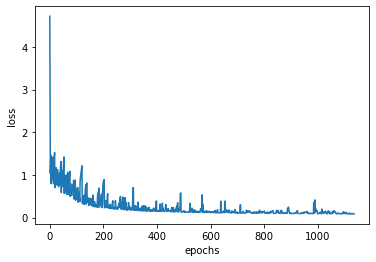

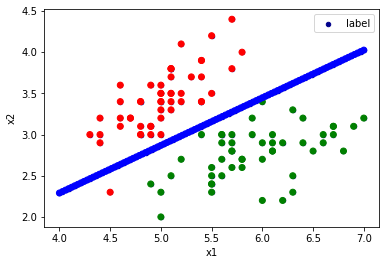

In [8]:
wSGD = SGD(data_x, data_y, alpha=0.1, maxepochs=10000, epsilon=1e-5)
wSGD = np.array(wSGD)
plot(wSGD)

## Mini-Batch Gradient Descent

Final loss value:  0.17060101586016316
MBGD Duration： 0.05002427101135254
Iteration:  378


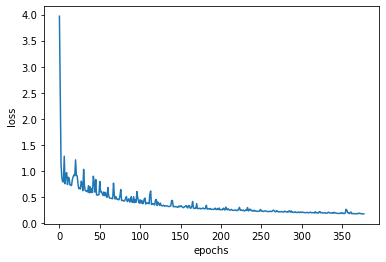

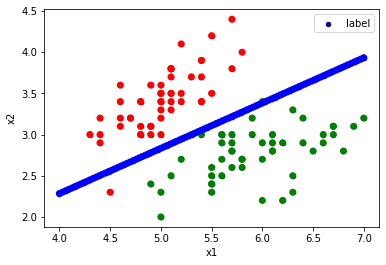

In [9]:
wMBGD = MBGD(data_x, data_y, alpha=0.1, batch_size=5, maxepochs=10000,epsilon=1e-5)
wMBGD = np.array(wMBGD)
plot(wMBGD)